In [58]:
#!/usr/bin/env python
# Plots data in binary dumps.
# Usage: python plot.py nl-shwave.0024.bin

from numpy import *
import sys
from matplotlib import use
use('Agg')
from matplotlib import pyplot

%matplotlib inline

/opt/gridware/depots/74ad4a9a/el7/pkg/apps/anaconda3/2.5.0/bin/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [59]:
#
# Read binary file
#
try:
  file = open('../../bin/rt.0002.bin','rb')
except:
  print('Usage: ./read.py <binary_dump>')
  sys.exit()

file.seek(0,2)
eof = file.tell()
file.seek(0,0)

coordsys = fromfile(file,dtype=int32,count=1)[0]

#nx,ny,nz = fromfile(file,dtype=int32,count=7)[:3]

ndata = fromfile(file,dtype=int32,count=7)[:7]
nx= ndata[0]
ny= ndata[1]
nz= ndata[2]


gamma1,cs = fromfile(file,dtype=float,count=2)

t,dt = fromfile(file,dtype=float,count=2)

x = fromfile(file,dtype=float,count=nx)
y = fromfile(file,dtype=float,count=ny)
z = fromfile(file,dtype=float,count=nz)

shape = (nz,ny,nx)
count = prod(shape)

rho = fromfile(file,dtype=float,count=count).reshape(shape)
m1 = fromfile(file,dtype=float,count=count).reshape(shape)
m2 = fromfile(file,dtype=float,count=count).reshape(shape)
m3 = fromfile(file,dtype=float,count=count).reshape(shape)
e = fromfile(file,dtype=float,count=count).reshape(shape)
b1 = fromfile(file,dtype=float,count=count).reshape(shape)
b2 = fromfile(file,dtype=float,count=count).reshape(shape)
b3 = fromfile(file,dtype=float,count=count).reshape(shape)

if file.tell() != eof: print('Error: Too few bytes read.')

file.close()

In [60]:
print(shape)
print(nx,ny,nz)
print(ndata)
print(t,dt)
print(gamma1,cs)
print(coordsys)
print(count)


(120, 120, 120)
120 120 120
[120 120 120   8   0   0   0]
1.03999641139 0.0649997685823
0.666666667 0.0
-1
1728000


In [61]:
print(z[0],z[1],z[63],z[119])
print(y[0],y[1],y[63],y[119])
print(x[0],x[1],x[63],x[119])
rhosec=rho[:,:,63]
m3sec=m3[:,:,63]
print(rhosec.shape)
print(rhosec[lay][0],rhosec[lay][30],rhosec[lay][63],rhosec[lay][118],rhosec[lay][119])
m7=m2sec/rhosec
lay=59
v2sec=m3sec/rhosec
print(v2sec[lay][0],v2sec[lay][30],v2sec[lay][63],v2sec[lay][118],v2sec[lay][119])
#print(rho[5][0],rho[5][30],rho[5][63],rho[5][119])
#print(rho[lay][0],rho[lay][1],rho[lay][30],rho[lay][63],rho[lay][117],rho[lay][118],rho[lay][119])
#print(m7[lay][0],m7[lay][1],m7[lay][30],m7[lay][63],m7[lay][117],m7[lay][118],m7[lay][119])
#print(m7[:,59])
#print(rho[:,59])
print(v2sec[:,59])

135243.381125 182643.483375 3121449.82287 5775855.54887
18611.62875 51928.68625 2117586.25125 3983341.47125
18611.62875 51928.68625 2117586.25125 3983341.47125
(120, 120)
8.67782608988e-12 8.67782607953e-12 8.67782607953e-12 8.67782563603e-12 8.67782608988e-12
-0.158669984904 -0.156888758692 -0.156888758692 -0.160389887126 -0.158669984904
[ -1.37679606e-01  -5.97944419e-02  -5.59104857e-02  -6.92378100e-02
   1.67197008e-02   4.84522626e-01   2.38889641e+00   5.58660603e+00
   6.38872856e+00   3.65910281e+00   1.00728091e+00   1.15124485e-01
  -1.92226890e-02  -2.95547288e-02  -2.99893878e-02  -3.34873279e-02
  -3.31193124e-02  -3.04464484e-02  -3.38162872e-02  -3.32512386e-02
  -3.47666671e-02  -3.50407119e-02  -3.71874698e-02  -3.91820184e-02
  -4.48799924e-02  -4.67080794e-02  -3.08648333e-02  -3.47171734e-02
  -5.15751638e-02  -1.14620977e-01  -1.18315726e-01  -8.04678884e-02
  -4.02017860e-02  -5.50491743e-02  -6.76164372e-02  -8.71769675e-02
  -1.10337145e-01  -1.21497963e-01  -1

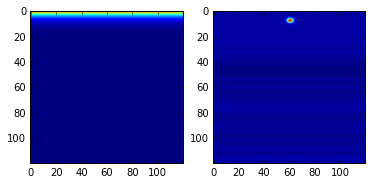

In [62]:
#
# Plot density field
#
fig1,ax1 = pyplot.subplots(1,2,num=1)

ax1[0].imshow(rhosec)

ax1[1].imshow(v2sec)


#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

#imgplot = plt.imshow(rho)
#imgplot.set_cmap('spectral')

#plt.plot(rho[96,:])
#print rho[96][:]




#fig1.savefig('fig1.png',dpi=fig1.get_dpi())
